# IA Paper 4 - Mathematics - Examples paper 1

## Question 5: Plotting vectors in 3D

Find a vector normal to both the lines    

\begin{align} 
\textbf{r}_1 &= (1,2,3) + \lambda (4,5,6)
\\ 
\textbf{r}_2 &= (2,3,2) + \mu (5,6,7)
\end{align} 

(i) Hence find the shortest distance between the two lines. Check that your answer seems reasonable by plotting the lines with Matplotlib.  

(ii) Calculate the shortest distance between the two lines with Python and find the points where the two lines are closest together.

__Hint:__ You will need to import and use a module from `mpl_toolkits`, e.g. 

    from mpl_toolkits.mplot3d import Axes3D

### Solution

(i) Import all relevant modules. Here, we will need `NumPy`, `PyPlot` from `matplotlib`, and `Axes3D` from `mpl_toolkits`

In [1]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Special command for plotting inside a Jupyter notebook
%matplotlib inline

We now compute two points one each line to be ready to plot the lines. It will be convenient to store the points as  two-dimensional array, with each colum holding the coordinates of a point. 

Let the shortest distance between two lines is the length $|\vec{\boldsymbol{P} \boldsymbol{Q}}|$ of their common normal, where $\boldsymbol{P}$ and $\boldsymbol{Q}$ are points on each corresponding line that are closest to each other.

If the lines are:

$$
\begin{aligned}
    \boldsymbol{r}_{1} &= \boldsymbol{M} + \lambda \boldsymbol{t} \\
    \boldsymbol{r}_{2} &= \boldsymbol{N} + \mu \boldsymbol{s}
\end{aligned}
$$

where $\boldsymbol{M}$ and $\boldsymbol{N}$ are arbitrary points on the lines, the vector $\vec{\boldsymbol{P} \boldsymbol{Q}}$ is in the direction:

$$
\begin{aligned}
    \boldsymbol{s} \times \boldsymbol{t} &= \boldsymbol{n} \\
    \boldsymbol{\hat{n}} &= \dfrac{\boldsymbol{s} \times \boldsymbol{t}  }{| \boldsymbol{s} \times \boldsymbol{t} |}
\end{aligned}
$$

To plot the lines in Python, we need to generate two points that lie on one line. We can simply achieve this by creating first a 3-element array `M` to store the coordinates of $\boldsymbol{M}$. 

In [2]:
# Definition of the lines
# First line
M = np.array([1, 2, 3])  # Point on line
t = np.array([4, 5, 6])  # Direction

Then, we can store the two points on the first line $\boldsymbol{r}_1$ in a $3 \times 2$ matrix - the first column is the point $\boldsymbol{M} + \lambda {t}$ and the second column is $\boldsymbol{M} - \lambda {t}$. By creating our `numpy` array `lam`, we can achieve this by:

In [3]:
# Create 3x2 matrix where each column is a point on the first line
lam = np.array([-2, 2])
r1 = np.array([M, M]).T + np.array([t, t]).T*lam

Similar for the second line. 

In [4]:
# Second line
N = np.array([2, 3, 2])  # Point on line
s = np.array([5, 6, 7])  # Direction

# Create 3x2 matrix where each column is a point on the second line
mu = np.array([-2, 2])
r2 = np.array([N, N]).T + np.array([s, s]).T*lam

The vector $\boldsymbol{\hat{n}}$ is perpendicular to both lines, hence we can find it using the `np.cross` command, which calculates the cross product of two vectors. The normalised vector can be obtained by dividing its vector with its norm (using `np.linalg.norm` to compute the norm). 

Now since $\boldsymbol{P}$ lies on the first line, its coordinates are of the form $\boldsymbol{M} + \lambda \boldsymbol{t}$ for some $\lambda$. 

Therfore, $\boldsymbol{Q}$ must be of the form:

$$
\boldsymbol{M} + \lambda \boldsymbol{t} + d \boldsymbol{\hat{n}}
$$

But $\boldsymbol{Q}$ also lies on the second line. This gives:

$$
\boldsymbol{M} + \lambda \boldsymbol{t} + d \boldsymbol{\hat{n}} = \boldsymbol{N} + \mu \boldsymbol{s}
$$

Taking the dot product with $\boldsymbol{\hat{n}}$ for both sides, noting that $\boldsymbol{\hat{n}} \cdot \boldsymbol{t} = \boldsymbol{\hat{n}} \cdot \boldsymbol{s} = \boldsymbol{0}$, gives us:

$$
\boldsymbol{d} = (\boldsymbol{N} - \boldsymbol{M}) \cdot \boldsymbol{\hat{n}}
$$

In [5]:
# Normal vector perpendicular to both lines
n = np.cross(t, s)
n = n/np.linalg.norm(n)

# Compute the distance at the nearest point
d = (N - M).dot(n)
print("Distance between lines at nearest point: {}".format(d))

Distance between lines at nearest point: 0.8164965809277261


To plot the lines using the pyplot we create a 3D plot. The 'camera view' can be changed to change the viewing angle.

AttributeError: 'Axes3DSubplot' object has no attribute 'hold'

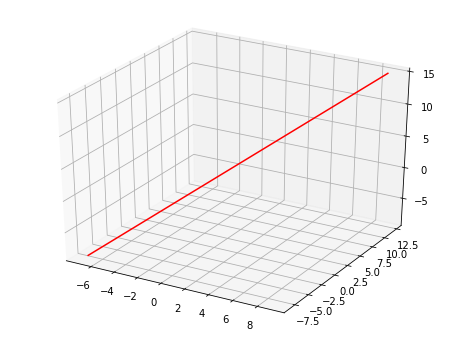

In [6]:
# Create 3D figure
fig = plt.figure(figsize=(8, 6))
ax = fig.gca(projection='3d')

# Plot r1
ax.plot(r1[0], r1[1], r1[2], "r-")
ax.hold("on")

# Plot r2
ax.plot(r2[0], r2[1], r2[2], "b-")

# Add legend
ax.legend(['$r_1$', '$r_2$'], loc='upper left')

# Add plot title
ax.set_title('Lines $r_1$ and $r_2$ in 3D')

# Set axes limits to be sensible
ax.set_xlim3d(min(r2[0]), max(r2[0]))
ax.set_ylim3d(min(r2[1]), max(r2[1]))
ax.set_zlim3d(min(r2[2]), max(r2[2]))

# Add axes labels
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Prevent axes labels being cut off
plt.tight_layout()

# Change angle and height of view
ax.view_init(elev=10, azim=65)

(ii) First we need to cast the problem into a system of linear equations which Python can understand:

$$
\boldsymbol{M} + \lambda \boldsymbol{t} + d \boldsymbol{\hat{n}} = \boldsymbol{N} + \mu \boldsymbol{s}
$$

Python can solve linear equations of the form:

$$
\boldsymbol{A} \boldsymbol{x} = \boldsymbol{b},
$$

where $\boldsymbol{A}$ is a matrix and $\boldsymbol{x}$ and $\boldsymbol{b}$ are vectors. From our linear equations, we can write:

$$
    \lambda \boldsymbol{t} - \mu\boldsymbol{s} + d \boldsymbol{\hat{n}} = \boldsymbol{N} - \boldsymbol{M} 
$$

This gives:

$$
\begin{aligned}
    \boldsymbol{A} &= 
    \left[
      \begin{matrix}
        | & | & | \\
        \boldsymbol{t}    & -\boldsymbol{s} & \boldsymbol{\hat{n}}    \\
        | & | & | 
      \end{matrix}
    \right] \\
    \boldsymbol{b} &= \boldsymbol{N} - \boldsymbol{M} \\
    \boldsymbol{x} &= \left( \begin{matrix} 
                            \lambda \\
                            \mu \\
                            d
                            \end{matrix} \right)
\end{aligned}
$$

To set up our matrix `A`, we need to stack our vectors `t`, `s`, and `n` column-wise. To do this, we use the command `np.column_stack`. 

In [ ]:
# Find points shortest distance apart
# Set up system of linear equatiosn
# P + lambda*t + d*n = Q + mu*s
A = np.column_stack((t, -s, n))
b = N - M

We can now solve for `x` to find $\lambda$, $\mu$ and $d$. 

In [ ]:
# Solve Ax = b, where x = [lambda, mu, d]
x = np.linalg.solve(A, b)

To plot the results, we need to first find the two points that are closest.

In [ ]:
# Points on lines at shortest distance apart
P = M + x[0]*t
Q = N + x[1]*s

For the perpendicular vector, `matplotlib` can draw a straight line in 3D if we provide its the coordinates of the starting and the ending point. We can get these two points by starting from one of the closest point, say `P`, and travelling along the perpendicular vector, `n`. The constant `2.0` here is chosen by inspection - students can alter the length of the normal line on the plot by increasing the constant. 

In [ ]:
# Two points on perpendicular vector
# to illustrate its orientation
D1 = P - 2.0*n
D2 = P + 2.0*n

Now we are ready to plot it the results in 3D. First, let us get the points on each line for plotting, using the same concept that was explained in (i).

In [ ]:
# Create normalised vector along the first and second line
t = t/np.linalg.norm(t)
s = s/np.linalg.norm(s)

# Create 3x2 matrix where each column is a point on the first line
# which are close to P1
r1_plot = np.array([P, P]).T + np.array([t, t]).T*lam

# Create 3x2 matrix where each column is a point on the second line
# which are close to Q1
r2_plot = np.array([Q, Q]).T + np.array([s, s]).T*mu

Then now, we are ready to plot the two lines and where they come the closest. 

In [ ]:
# Create 3D figure
fig = plt.figure(figsize=(8, 6))
ax = fig.gca(projection='3d')

# Plot r1
ax.plot(r1_plot[0], r1_plot[1], r1_plot[2], "r-", label='$r_1$')

# Plot r2
ax.plot(r2_plot[0], r2_plot[1], r2_plot[2], "b-", label='$r_2$')

# Plot the normal vector
ax.plot([D1[0], D2[0]], [D1[1], D2[1]], [D1[2], D2[2]], 'k-',
        label='normal vector')

# Plot the closest points
ax.scatter(P[0], P[1], P[2], s=100, c='r')
ax.scatter(Q[0], Q[1], Q[2], s=100, c='b')

# Add legend
ax.legend(loc='upper left')

# Add axes labels
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Prevents axes labels being cut off
plt.tight_layout()

# Change angle and height of view
ax.view_init(elev=10, azim=65)

# Reduce the number of ticks along the axis
# Try commenting these lines out to see the effect
plt.locator_params(axis='y', nbins=6)
plt.locator_params(axis='z', nbins=6)